<a href="https://colab.research.google.com/github/rashid818/stockpred_lstm/blob/main/bajaj_fin_stock_lstmproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,UpSampling2D
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/MyDrive/data/BAJFINANCE__EQ__NSE__NSE__MINUTE.csv.zip')

In [3]:
df

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,851.65,857.75,849.30,855.00,9208.0
1,2017-01-02 09:16:00+05:30,855.00,856.10,853.80,854.05,5092.0
2,2017-01-02 09:17:00+05:30,854.05,854.40,851.55,852.00,16448.0
3,2017-01-02 09:18:00+05:30,851.45,852.00,849.75,850.75,6170.0
4,2017-01-02 09:19:00+05:30,850.50,850.50,846.20,846.25,5669.0
...,...,...,...,...,...,...
370541,2021-01-01 15:25:00+05:30,5269.95,5274.95,5269.55,5271.75,5311.0
370542,2021-01-01 15:26:00+05:30,5271.75,5274.95,5270.45,5272.00,2757.0
370543,2021-01-01 15:27:00+05:30,5273.90,5275.00,5271.00,5272.00,2769.0
370544,2021-01-01 15:28:00+05:30,5272.00,5273.90,5270.00,5272.80,6658.0


In [4]:
df.dropna(inplace=True)

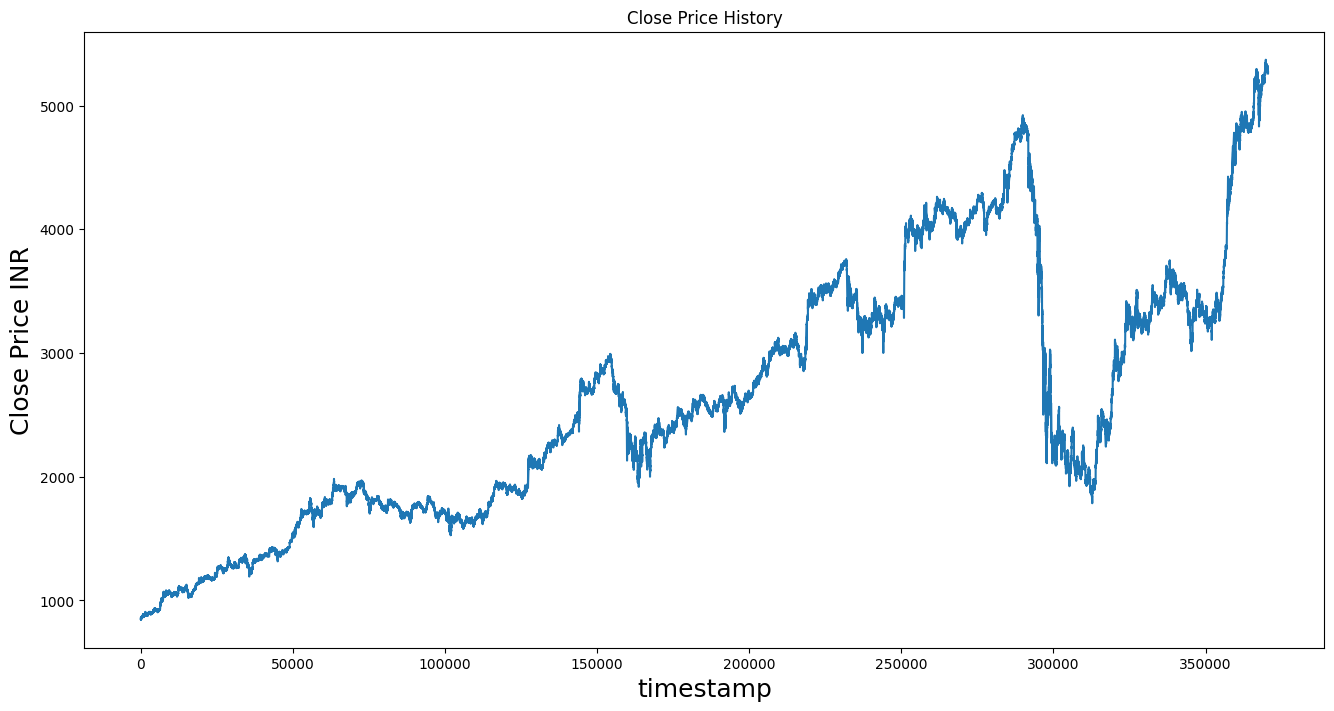

In [5]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

## ***Converting data to a numpy array***

In [6]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.7)

In [7]:
dataset

array([[ 855.  ],
       [ 854.05],
       [ 852.  ],
       ...,
       [5272.  ],
       [5272.8 ],
       [5272.  ]])

### ***Transforming the dataset array to range between 0 and 1***

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### ***Building a LSTM Model for Stock Market Prediction***

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

### ***Using adam optimizer and mean_squared_error as the loss function***

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.fit(x_train, y_train, batch_size=64, epochs=1)

4051/4051 [==============================] - 43s 8ms/step - loss: 9.8596e-05


In [16]:
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

3473/3473 [==============================] - 16s 4ms/step


### ***Finding the root mean squared error***

In [20]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

15.86512223122436

### ***Plotting the predicted values***

<ipython-input-21-d1d3e758b1fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display['Predictions'] = predictions#Visualize the data


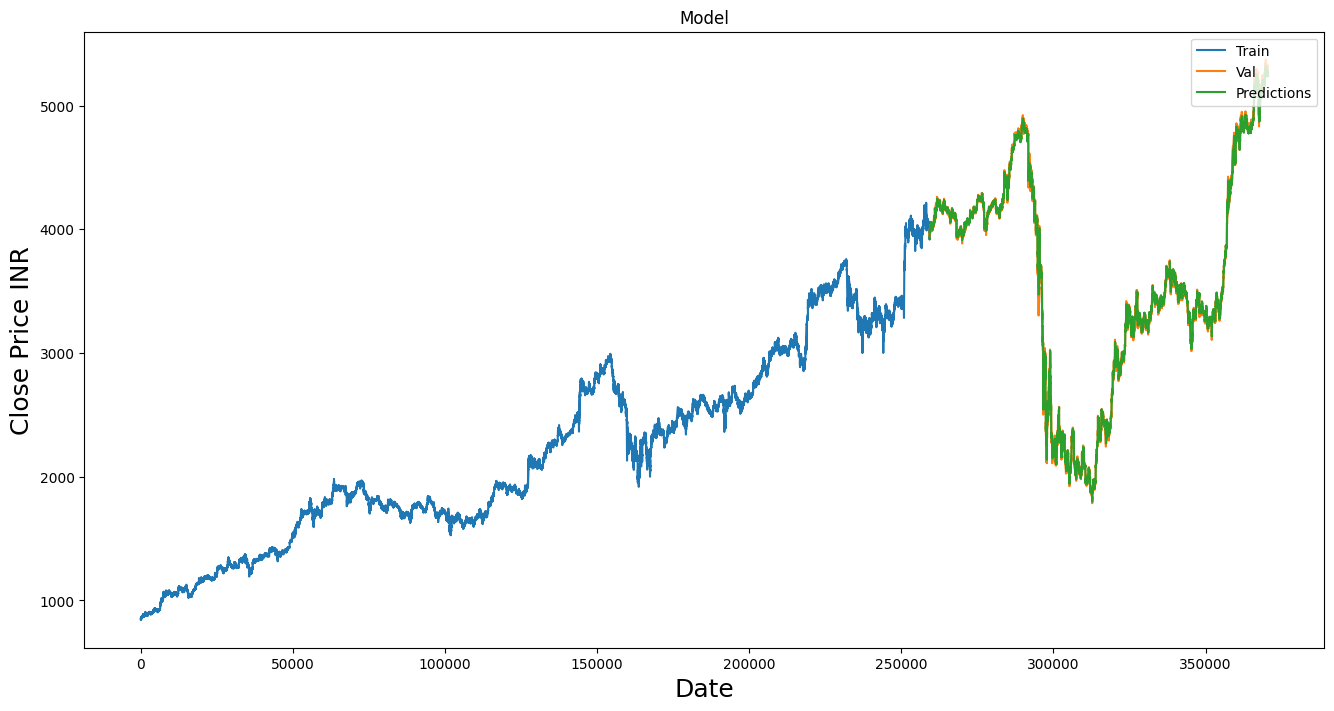

In [21]:
train = data[:training_data_len]
display = data[training_data_len:]
display['Predictions'] = predictions#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['close'])
plt.plot(display['close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

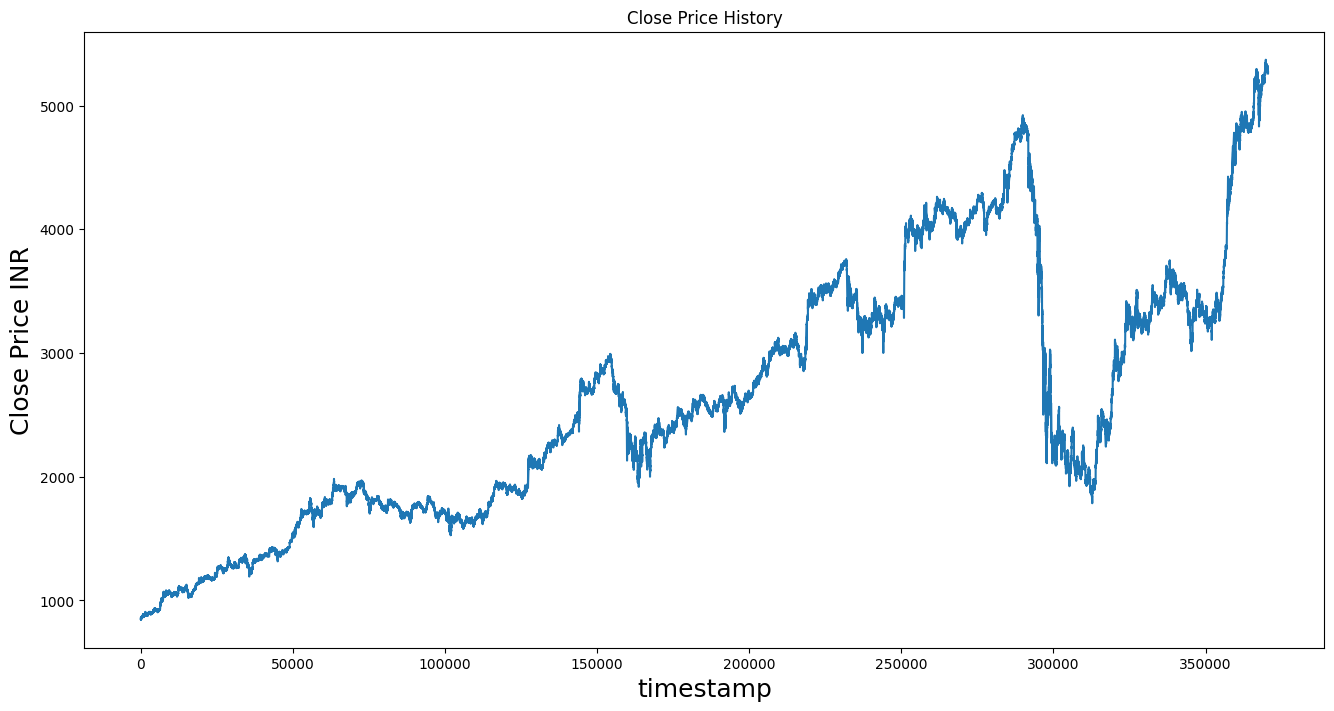

In [22]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()